In [ ]:
!pip install gensim
!pip install umap-learn
!pip install wikipedia
!pip install unidecode

You should consider upgrading via the 'c:\users\user\opencv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\opencv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\opencv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\opencv\scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
import re
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
import wikipedia
import string
from unidecode import unidecode
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import urllib.request
import bz2
import gensim
import warnings
import numpy as np
from gensim.models import word2vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

# Definição do Corpus

## Base

In [ ]:
wikipedia.set_lang("pt")
bh = wikipedia.page("Belo Horizonte")

In [ ]:
corpus = bh.content

Selecionamos algumas frases do corpus de BH da wikipedia.

Conside a lista abaixo como nosso corpus de documentos. Cada elemento da lista, considere como um único documento.

In [ ]:
documentos = \
["Belo Horizonte é um município brasileiro e a capital do estado de Minas Gerais",
"A populacao de Belo Horizonte é estimada em 2 501 576 habitantes, conforme estimativas do Instituto Brasileiro de Geografia e Estatística",
"Belo Horizonte já foi indicada pelo Population Crisis Commitee, da ONU, como a metrópole com melhor qualidade de vida na América Latina",
"Belo Horizonte é mundialmente conhecida e exerce significativa influência nacional e até internacional, seja do ponto de vista cultural, econômico ou político",
"Belo Horizonte é a capital do segundo estado mais populoso do Brasil, Minas Gerais"]

## Preprocessamento

<b> Atividade </b>

1) Escreva uma método que realiza o pré-processamento da lista de <b>documentos</b>.

O método deve, para cada documento:
- tokenizar cada palavra
- aplicar capitalização(lower case)
- remover stopwords
- remover números
- remover pontuções
- remover acentos

In [ ]:
palavras_stops = stopwords.words('portuguese')

In [ ]:
frase = documentos[0]

In [ ]:
def pre_processamento_texto(frase):

    #token
    corpus_alt = re.findall(r"\w+(?:'\w+)?|[^\w\s]", frase)

    #aplicar lower
    corpus_alt = [t.lower() for t in corpus_alt]

    #remove stops
    corpus_alt = [p for p in corpus_alt if p not in palavras_stops]

    #remove numeros
    corpus_alt = [re.sub(r'\d', '', p) for p in corpus_alt]

    #remove pontuacoes
    corpus_alt = [p for p in corpus_alt if p not in string.punctuation]

    #remove acentos
    corpus_alt = [unidecode(p) for p in corpus_alt]

    return corpus_alt

In [ ]:
pre_processamento_texto(documentos[0])

['belo',
 'horizonte',
 'municipio',
 'brasileiro',
 'capital',
 'estado',
 'minas',
 'gerais']

In [ ]:
corpus_processado = [pre_processamento_texto(doc) for doc in documentos]

In [ ]:
corpus_processado

[['belo',
  'horizonte',
  'municipio',
  'brasileiro',
  'capital',
  'estado',
  'minas',
  'gerais'],
 ['populacao',
  'belo',
  'horizonte',
  'estimada',
  'habitantes',
  'conforme',
  'estimativas',
  'instituto',
  'brasileiro',
  'geografia',
  'estatistica'],
 ['belo',
  'horizonte',
  'indicada',
  'population',
  'crisis',
  'commitee',
  'onu',
  'metropole',
  'melhor',
  'qualidade',
  'vida',
  'america',
  'latina'],
 ['belo',
  'horizonte',
  'mundialmente',
  'conhecida',
  'exerce',
  'significativa',
  'influencia',
  'nacional',
  'internacional',
  'ponto',
  'vista',
  'cultural',
  'economico',
  'politico'],
 ['belo',
  'horizonte',
  'capital',
  'segundo',
  'estado',
  'populoso',
  'brasil',
  'minas',
  'gerais']]

# Representação Textual

## N-grams

Existem várias formas de calcular os N-grams.

Iremos estudar o: Phrases do gensim e o ngrams do NLTK

### NLTK

Para retornar o ngrams do nltk, utilize o exemplo abaixo:

```python
list(ngrams(corpus, 2)
```

<b> Atividade </b>

2) Faça um código para armazena os bigrams de cada documento do corpus <b>corpus_processado</b> na variável corpus_ngrams_nltk.
Depois imprima os bigramas de cada documento

In [ ]:
list(ngrams(corpus_processado[0], 2))

[('belo', 'horizonte'),
 ('horizonte', 'municipio'),
 ('municipio', 'brasileiro'),
 ('brasileiro', 'capital'),
 ('capital', 'estado'),
 ('estado', 'minas'),
 ('minas', 'gerais')]

In [ ]:
corpus_ngrams_nltk = [list(ngrams(doc, 2)) for doc in corpus_processado]

In [ ]:
len(corpus_processado)

5

In [ ]:
for i in range(0, len(corpus_processado)):
    print('Bigrams doc ', i)
    print(corpus_ngrams_nltk[i])
    print()


Bigrams doc  0
[('belo', 'horizonte'), ('horizonte', 'municipio'), ('municipio', 'brasileiro'), ('brasileiro', 'capital'), ('capital', 'estado'), ('estado', 'minas'), ('minas', 'gerais')]

Bigrams doc  1
[('populacao', 'belo'), ('belo', 'horizonte'), ('horizonte', 'estimada'), ('estimada', 'habitantes'), ('habitantes', 'conforme'), ('conforme', 'estimativas'), ('estimativas', 'instituto'), ('instituto', 'brasileiro'), ('brasileiro', 'geografia'), ('geografia', 'estatistica')]

Bigrams doc  2
[('belo', 'horizonte'), ('horizonte', 'indicada'), ('indicada', 'population'), ('population', 'crisis'), ('crisis', 'commitee'), ('commitee', 'onu'), ('onu', 'metropole'), ('metropole', 'melhor'), ('melhor', 'qualidade'), ('qualidade', 'vida'), ('vida', 'america'), ('america', 'latina')]

Bigrams doc  3
[('belo', 'horizonte'), ('horizonte', 'mundialmente'), ('mundialmente', 'conhecida'), ('conhecida', 'exerce'), ('exerce', 'significativa'), ('significativa', 'influencia'), ('influencia', 'nacional'

### Phrases - Gensim

Forma mais inteligente de calcular os bigrams. Ela calcula os bigramas levando em consideração a frequência do par das palavaras em todos os documentos.
Para isso ele treina um modelo e depois aplica no corpus.

```python
#treinamento bigrams
model_corpus_phrases = gensim.models.Phrases(corpus_processado, min_count=1)
#calulando os bigrams do corpus processado
bigram_corpus = model_corpus_phrases[corpus_processado]
```

<b> Atividade </b>

3) Faça um código que treine os bigrams, sendo que o <b>min_count = 1</b>.
O <b>min_count</b> é a contagem mínima que aquele par de palavras deve aparecer junto para considerarmos com um token. Teste também com outros valores de mim_count. Depois imprima os bigramas de cada documento.
Use o corpus_processado.

In [ ]:
gensim.models.Phrases?

In [ ]:
model_corpus_phrases = gensim.models.Phrases(corpus_processado, min_count=1)

In [ ]:
model_corpus_phrases2 = gensim.models.Phrases(corpus_processado, min_count=20)

In [ ]:
bigram_corpus = model_corpus_phrases[corpus_processado]

In [ ]:
bigram_corpus2 = model_corpus_phrases2[corpus_processado]

In [ ]:
for i in range(0, len(bigram_corpus)):
    print('Bigramas doc', i)
    print(bigram_corpus[i])
    print()

Bigramas doc 0
['belo_horizonte', 'municipio', 'brasileiro', 'capital', 'estado', 'minas_gerais']

Bigramas doc 1
['populacao', 'belo_horizonte', 'estimada', 'habitantes', 'conforme', 'estimativas', 'instituto', 'brasileiro', 'geografia', 'estatistica']

Bigramas doc 2
['belo_horizonte', 'indicada', 'population', 'crisis', 'commitee', 'onu', 'metropole', 'melhor', 'qualidade', 'vida', 'america', 'latina']

Bigramas doc 3
['belo_horizonte', 'mundialmente', 'conhecida', 'exerce', 'significativa', 'influencia', 'nacional', 'internacional', 'ponto', 'vista', 'cultural', 'economico', 'politico']

Bigramas doc 4
['belo_horizonte', 'capital', 'segundo', 'estado', 'populoso', 'brasil', 'minas_gerais']



In [ ]:
for i in range(0, len(bigram_corpus2)):
    print('Bigramas doc', i)
    print(bigram_corpus2[i])
    print()

Bigramas doc 0
['belo', 'horizonte', 'municipio', 'brasileiro', 'capital', 'estado', 'minas', 'gerais']

Bigramas doc 1
['populacao', 'belo', 'horizonte', 'estimada', 'habitantes', 'conforme', 'estimativas', 'instituto', 'brasileiro', 'geografia', 'estatistica']

Bigramas doc 2
['belo', 'horizonte', 'indicada', 'population', 'crisis', 'commitee', 'onu', 'metropole', 'melhor', 'qualidade', 'vida', 'america', 'latina']

Bigramas doc 3
['belo', 'horizonte', 'mundialmente', 'conhecida', 'exerce', 'significativa', 'influencia', 'nacional', 'internacional', 'ponto', 'vista', 'cultural', 'economico', 'politico']

Bigramas doc 4
['belo', 'horizonte', 'capital', 'segundo', 'estado', 'populoso', 'brasil', 'minas', 'gerais']



## TD-IDF

Dica de leitura: https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.XklQxnVKj7c

Para representar o texto com TF-IDF utilizamos o TfidfVectorizer. A seguir apresentamos instruções sobre como utilizá-lo.

```python
#primeiro criamos o objeto
vect = TfidfVectorizer()
vect #aqui você pode observa todos os parâmetros que o objeto possui
## Existem alguns parâmetros, opcionais, que podemos informar para uma possível melhora do nosso modelo. Por exemplo:
### inclui 1-grams e 2-grams
vect.set_params(ngram_range=(1, 2))
### ignora termos que a aparecem em mais de 50% dos documentoss
vect.set_params(max_df=0.5)
### só considero termos que aparecem em ao menos 2 documentos
vect.set_params(min_df=2)

#depois aplicamos fit_transform para transformar o texto em números
docs_tdidf = vect.fit_transform(docs)

#o docs_tdidf é uma matriz com os números que representam cada um dos textos.
## Conseguimos verificar a dimensão desta matriz:
print(docs_tdidf.shape)

#Para visualizar as features capturadas pelo TF-IDF utilize:
print(vect.get_feature_names())
#Para visualizar os vetores correspondentes a cada palavara utilize:
df = pd.DataFrame(docs_tdidf.T.todense(), index=vect.get_feature_names(), columns=["doc"+str(i+1) for i in range(0,len(docs))])
df
```

<b> Atividade: </b>

4) Faça o TDIFTVectorizer nos documentos da variável <b>documentos</b> sem alterar nenhum parâmetro.

In [ ]:
vect = TfidfVectorizer()
vect

TfidfVectorizer()

In [ ]:
docs_tfidf = vect.fit_transform(documentos)
docs_tfidf.todense()[0]

matrix([[0.        , 0.        , 0.        , 0.        , 0.18919231,
         0.        , 0.32033043, 0.32033043, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.22368615, 0.22368615, 0.        , 0.        ,
         0.32033043, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.32033043, 0.        , 0.18919231,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.32033043,
         0.        , 0.39704132, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.39704132, 0.        , 0.        ]])

In [ ]:
docs_tfidf

<5x59 sparse matrix of type '<class 'numpy.float64'>'
	with 78 stored elements in Compressed Sparse Row format>

<b> Atividade </b>

5) Imprima o shape do resultado da atividade 4

In [ ]:
docs_tfidf.shape

(5, 59)

<b> Atividade </b>

6) Imprima as features capturadas em 4.

In [ ]:
vect.get_feature_names()

['brasileiro',
 'capital',
 'capital do',
 'estado',
 'gerais',
 'minas',
 'minas gerais']

7) Imprima os vetores correspondentes a cada palavra de cada documento.

In [ ]:
pd.DataFrame(docs_tfidf.todense().T, index=vect.get_feature_names())

,0,1,2,3,4
501,0.000000,0.270250,0.000000,0.000000,0.000000
576,0.000000,0.270250,0.000000,0.000000,0.000000
américa,0.000000,0.000000,0.230808,0.000000,0.000000
até,0.000000,0.000000,0.000000,0.249308,0.000000
belo,0.189192,0.128776,0.109981,0.118797,0.165125
brasil,0.000000,0.000000,0.000000,0.000000,0.346534
brasileiro,0.320330,0.218036,0.000000,0.000000,0.000000
capital,0.320330,0.000000,0.000000,0.000000,0.279581
com,0.000000,0.000000,0.230808,0.000000,0.000000
commitee,0.000000,0.000000,0.230808,0.000000,0.000000


<b> Atividade </b>

8) Depois repita os itens 4,5,6 e 7 aplicando a alteração de parâmetros

In [ ]:
#primeiro criamos o objeto
vect = TfidfVectorizer()
vect #aqui você pode observa todos os parâmetros que o objeto possui
## Existem alguns parâmetros, opcionais, que podemos informar para uma possível melhora do nosso modelo. Por exemplo:
### inclui 1-grams e 2-grams
vect.set_params(ngram_range=(1, 2))
### ignora termos que a aparecem em mais de 50% dos documentoss
vect.set_params(max_df=0.5)
### só considero termos que aparecem em ao menos 2 documentos
vect.set_params(min_df=2)

#depois aplicamos fit_transform para transformar o texto em números
docs_tdidf = vect.fit_transform(documentos)

#o docs_tdidf é uma matriz com os números que representam cada um dos textos.
## Conseguimos verificar a dimensão desta matriz:
print(docs_tdidf.shape)

(5, 7)


In [ ]:
vect.get_feature_names()

['brasileiro',
 'capital',
 'capital do',
 'estado',
 'gerais',
 'minas',
 'minas gerais']

In [ ]:
vect

TfidfVectorizer(max_df=0.5, min_df=2, ngram_range=(1, 2))

In [ ]:
#primeiro criamos o objeto
vect = TfidfVectorizer()
vect #aqui você pode observa todos os parâmetros que o objeto possui
## Existem alguns parâmetros, opcionais, que podemos informar para uma possível melhora do nosso modelo. Por exemplo:
### inclui 1-grams e 2-grams
vect.set_params(ngram_range=(1, 2))
### ignora termos que a aparecem em mais de 50% dos documentoss
vect.set_params(max_df=0.4)
### só considero termos que aparecem em ao menos 2 documentos
vect.set_params(min_df=2)

#depois aplicamos fit_transform para transformar o texto em números
docs_tdidf = vect.fit_transform(documentos)

#o docs_tdidf é uma matriz com os números que representam cada um dos textos.
## Conseguimos verificar a dimensão desta matriz:
print(docs_tdidf.shape)

(5, 7)


In [ ]:
vect.get_feature_names()

['brasileiro',
 'capital',
 'capital do',
 'estado',
 'gerais',
 'minas',
 'minas gerais']

## Bag of Words

Para representar o bag of words utilizamos o CountVectorizer

```python
#primeiro criamos o objeto
vect_bag = CountVectorizer(binary=True) #se binary = False -> ocorre a contagem da frequência em que a palavra aparece
vect_bag #imprime os parâmetros

```

<b> Atividade </b>

9) Faça o CountVectorizer nos documentos da variável <b>documentos</b> considerando binary = True

In [ ]:
vect_bag = CountVectorizer(binary=True)
vect_bag

CountVectorizer(binary=True)

In [ ]:
docs_bag = vect_bag.fit_transform(documentos)

<b> Atividade </b>

10) Imprima o índice correspondente a cada token da lista retornada por vect_bag.get_feature_names()

In [ ]:
pd.DataFrame(docs_bag.todense().T, index=vect_bag.get_feature_names())

,0,1,2,3,4
501,0,1,0,0,0
576,0,1,0,0,0
américa,0,0,1,0,0
até,0,0,0,1,0
belo,1,1,1,1,1
brasil,0,0,0,0,1
brasileiro,1,1,0,0,0
capital,1,0,0,0,1
com,0,0,1,0,0
commitee,0,0,1,0,0


<b> Atividade </b>

11) Observe cada palavra do primeiro documento da vairável documents (documents[0]) e o vetor retornado para este mesmo documento
(docs_bag.todense()[0]).

Com o resultado da célula anterior, check se as posições preenchidas com '1' são as posições que representam cada uma das palavras do docs[0].
Observe que é o bag of Words que vimos em sala.

## Embedding

### Utilizando um embedding treinado

<b> Atividade </b>

12) Faça download do seguinte arquivo, realize a leitura deste arquivo e carregue o modelo:
https://drive.google.com/open?id=1zI8pGfbUHuU_0wY_FV4tD6w6ZCUJTQbh


O código abaixo é um exmplo de como ler o arquivo que você fez download.

```python
newfilepath = "embedding_wiki_100d_pt.txt"
filepath = "ptwiki_20180420_100d.txt.bz2"
with open(newfilepath, 'wb') as new_file, bz2.BZ2File(filepath, 'rb') as file:
    for data in iter(lambda : file.read(100 * 1024), b''):
        new_file.write(data)
        
#carregar
word_vectors = gensim.models.KeyedVectors.load_word2vec_format(newfilepath, binary=False)
```

<b> Dica </b> Use %%time para capturar o tempo de execução em cada célula.

In [ ]:
word_vectors = gensim.models.KeyedVectors.load_word2vec_format("ptwiki_20180420_100d.txt.bz2", binary=False)

<b> Atividade </b>

13) Imprima os vetores das palavras "nlp" e "computacao"

```python
#exemplo de retorno do vetor
word_vectors[__]
```

In [ ]:
word_vectors['nlp']

array([ 0.8528,  0.1094, -0.0296, -0.0458, -0.2029, -0.1839, -0.2012,
       -0.111 , -0.0315,  0.1895, -0.2194, -0.3496, -0.1319, -0.1594,
        0.1549, -0.493 ,  0.1897, -0.296 ,  0.0026,  0.2015,  0.0215,
        0.2946, -0.2024,  0.3931,  0.143 ,  0.0667, -0.4868,  0.048 ,
       -0.1028,  0.2372,  0.2042, -0.8025, -0.1221,  0.475 , -0.2997,
        0.219 ,  0.1232, -0.2118,  0.5402, -0.0768,  0.2253,  0.1285,
       -0.6157,  0.1777,  0.0306, -0.1094, -0.1649, -0.386 , -0.2692,
        0.3149,  0.0391, -0.0821, -0.2238,  0.033 ,  0.5032,  0.0836,
        0.1834, -0.2009, -0.0722, -0.1744,  0.3946, -0.0792, -0.0863,
        0.3813,  0.5876, -0.4447, -0.5435,  0.1528, -0.1012, -0.0967,
       -0.2621,  0.4737,  0.3235, -1.1013, -0.0789,  0.1945, -0.1304,
       -0.0379,  0.899 ,  0.0398,  0.2908, -0.4276, -0.0641, -0.3841,
        0.354 ,  0.4139,  0.1076, -0.3439, -0.1474, -0.1215,  0.4359,
       -0.1563,  0.2577,  0.4333,  0.2003, -0.4064, -0.818 ,  0.0812,
       -0.2554, -0.4

In [ ]:
word_vectors['computacao']

array([ 0.5076, -0.2598,  0.0993,  0.1021, -0.2076, -0.2745,  0.0104,
        0.0107,  0.0151,  0.2485, -0.2933,  0.1184, -0.4087, -0.0381,
        0.0528, -0.2312,  0.1387,  0.1144,  0.0291,  0.164 , -0.0941,
        0.1045, -0.1874,  0.0116,  0.1133, -0.11  , -0.0607,  0.047 ,
       -0.0259,  0.4073,  0.1337, -0.3197,  0.0559,  0.2985, -0.0571,
       -0.2967,  0.0675,  0.1016,  0.4049, -0.347 ,  0.1782, -0.2004,
       -0.1565, -0.0758,  0.3695,  0.0918, -0.0197, -0.4832, -0.5214,
        0.124 ,  0.3514,  0.1103,  0.0646, -0.0722,  0.2532, -0.0997,
       -0.0581, -0.0238, -0.164 , -0.0828,  0.5997, -0.1605,  0.0169,
        0.3451,  0.3026, -0.0841, -0.1699,  0.2674,  0.0184, -0.1471,
       -0.218 , -0.0565, -0.1998, -0.3754, -0.1754,  0.1689, -0.2062,
        0.2613,  0.1208, -0.217 ,  0.1932, -0.3372, -0.119 , -0.1323,
       -0.4022,  0.0883,  0.1728, -0.2999, -0.0619,  0.3041,  0.1596,
       -0.2037,  0.1473, -0.0561,  0.1435, -0.0683, -0.2464, -0.0562,
        0.0109,  0.0

<b> Similaridade de Vetores </b>

No gensim é possível realizar a similaridade utilizando o seguinte método:

```python
word_vectors.most_similar(___)
```

<b> Atividade </b>

14) Verifique a similaridade das seguintes palavras: elizabete, raiva, segunda, dois, computação.

In [ ]:
word_vectors.most_similar('raiva')

[('medo', 0.8303433656692505),
 ('frustração', 0.8079831600189209),
 ('desespero', 0.8039345741271973),
 ('tristeza', 0.800615668296814),
 ('remorso', 0.7922823429107666),
 ('desgosto', 0.7901228666305542),
 ('inveja', 0.781806468963623),
 ('ciúmes', 0.7798185348510742),
 ('ódio', 0.776374101638794),
 ('repugnância', 0.7657582759857178)]

In [ ]:
word_vectors.most_similar('elizabete')

[('joana', 0.7828384041786194),
 ('elídia', 0.7808018922805786),
 ('arcângela', 0.7692556381225586),
 ('maria', 0.7659809589385986),
 ('felisbela', 0.7649518847465515),
 ('andreza', 0.7636873722076416),
 ('thomazia', 0.7636217474937439),
 ('francisca', 0.7602137327194214),
 ('eleonora', 0.7596681118011475),
 ('deodata', 0.7594977617263794)]

In [ ]:
word_vectors.most_similar('segunda')

[('primeira', 0.8965903520584106),
 ('quarta', 0.8717238903045654),
 ('terceira', 0.8408156037330627),
 ('última', 0.8141331672668457),
 ('sétima', 0.807178258895874),
 ('sexta', 0.7998778820037842),
 ('décima', 0.7983245849609375),
 ('penúltima', 0.7719092965126038),
 ('nona', 0.7675511240959167),
 ('oitava', 0.7670223712921143)]

In [ ]:
word_vectors.most_similar('dois')

[('três', 0.8804982304573059),
 ('quatro', 0.8787742257118225),
 ('seis', 0.844917893409729),
 ('cinco', 0.8440984487533569),
 ('oito', 0.8346582651138306),
 ('ambos', 0.82096266746521),
 ('nove', 0.8060351014137268),
 ('vários', 0.8052262663841248),
 ('os', 0.8016588091850281),
 ('sete', 0.7854640483856201)]

In [ ]:
word_vectors.most_similar('computação')

[('computacional', 0.8587305545806885),
 ('informática', 0.8066875338554382),
 ('microeletrônica', 0.7903156280517578),
 ('bioinspirada', 0.7866970300674438),
 ('computacionais', 0.7839764356613159),
 ('biomatemática', 0.7749572992324829),
 ('ubicomp', 0.7651089429855347),
 ('lamce', 0.7647029757499695),
 ('imecc', 0.7626293897628784),
 ('bioinformática', 0.7598603963851929)]

<b> Operação Vetorial</b>

Na aula teórica, estudamos sobre as operação entre os vetores.
Agora vamos ver na prática:

```python
#exemplo:
word_vectors.wv.most_similar(positive=['mulher', 'rei'], negative=['homem'], topn=10)
```

<b>Atividade</b>

15) Execute o exemplo acima em uma célula e repita para os seguintes cenários:

- menino, menina, homem
- caminhada, andar, correr
- filho, filha, irmã
- pai, mãe, avô

<b> Reflita </b> as palavras similares fazem sentido?

In [ ]:
word_vectors.wv.most_similar(positive=['mulher', 'rei'], negative=['homem'], topn=10)

[('rainha', 0.8195168375968933),
 ('consorte', 0.7614860534667969),
 ('françae', 0.7443714141845703),
 ('teticheri', 0.7328507304191589),
 ('princesa', 0.731076717376709),
 ('esposa', 0.723304033279419),
 ('mutemuia', 0.7139754295349121),
 ('saovabha', 0.7129839658737183),
 ('coroação', 0.7080511450767517),
 ('sālote', 0.7042379379272461)]

In [ ]:
word_vectors.most_similar(positive=['menino', 'menina'], negative=['homem'], topn=10)

[('garotinha', 0.746025800704956),
 ('criança', 0.7124738693237305),
 ('izildinha', 0.6914386749267578),
 ('garota', 0.6765151619911194),
 ('órfã', 0.6759505271911621),
 ('filhinha', 0.6749870777130127),
 ('avó', 0.6711723804473877),
 ('babá', 0.6623851656913757),
 ('irmãzinha', 0.6621854305267334),
 ('moça', 0.6594897508621216)]

In [ ]:
word_vectors.most_similar(positive=['caminhada', 'andar'], negative=['correr'], topn=10)

[('caminhadas', 0.618974506855011),
 ('pavimento', 0.606018602848053),
 ('passeio', 0.6024052500724792),
 ('piquenique', 0.598796546459198),
 ('sala', 0.5944793224334717),
 ('terraço', 0.5920617580413818),
 ('rampa', 0.5885153412818909),
 ('passarela', 0.5874667167663574),
 ('climatizada', 0.5863767862319946),
 ('calçadão', 0.5852184295654297)]

In [ ]:
word_vectors.most_similar(positive=['filho', 'filha'], negative=['irmã'], topn=10)

[('bisneto', 0.851236879825592),
 ('neto', 0.8316095471382141),
 ('primogênito', 0.8290099501609802),
 ('bisavô', 0.822635293006897),
 ('sobrinho', 0.8176089525222778),
 ('avô', 0.816977858543396),
 ('sogro', 0.8009151220321655),
 ('pai', 0.799014687538147),
 ('primogénito', 0.785844624042511),
 ('genro', 0.7755304574966431)]

In [ ]:
word_vectors.most_similar(positive=['pai', 'mãe'], negative=['avô'], topn=10)

[('avó', 0.8150790929794312),
 ('adotiva', 0.8064451813697815),
 ('irmã', 0.7990934252738953),
 ('esposa', 0.7982308268547058),
 ('madrasta', 0.7841061353683472),
 ('tia', 0.7805376052856445),
 ('falecida', 0.7775087356567383),
 ('eutímia', 0.7673025727272034),
 ('superprotegida', 0.7659645676612854),
 ('consternada', 0.7656985521316528)]

<b> Similaridade Palavras </b>

```python
#exemplo:
word_vectors.wv.similarity('mulher', 'homem')
```

<b> Atividade </b>

16) Verifique a similaridade entre as seguintes palavras:

- mulher, homem
- homem, mulher
- computação, computacao
- londres, homem

In [ ]:
word_vectors.similarity('mulher', 'homem')

0.6771901

In [ ]:
word_vectors.similarity('homem', 'mulher')

0.6771901

In [ ]:
word_vectors.similarity('computação', 'computacao')

0.5200784

In [ ]:
word_vectors.similarity('londres', 'homem')

0.28118974

### Treinando seu embedding

Aqui vamos utilizar o corpus machado. São textos/contos escritos por Machado de Assis.
Esse corpus é diponibilizado pelo NLTK.

In [ ]:
from nltk.corpus import machado

In [ ]:
machado.fileids()

['contos/macn001.txt',
 'contos/macn002.txt',
 'contos/macn003.txt',
 'contos/macn004.txt',
 'contos/macn005.txt',
 'contos/macn006.txt',
 'contos/macn007.txt',
 'contos/macn008.txt',
 'contos/macn009.txt',
 'contos/macn010.txt',
 'contos/macn011.txt',
 'contos/macn012.txt',
 'contos/macn013.txt',
 'contos/macn014.txt',
 'contos/macn015.txt',
 'contos/macn016.txt',
 'contos/macn017.txt',
 'contos/macn018.txt',
 'contos/macn019.txt',
 'contos/macn020.txt',
 'contos/macn021.txt',
 'contos/macn022.txt',
 'contos/macn023.txt',
 'contos/macn024.txt',
 'contos/macn025.txt',
 'contos/macn026.txt',
 'contos/macn027.txt',
 'contos/macn028.txt',
 'contos/macn029.txt',
 'contos/macn030.txt',
 'contos/macn031.txt',
 'contos/macn032.txt',
 'contos/macn033.txt',
 'contos/macn034.txt',
 'contos/macn035.txt',
 'contos/macn036.txt',
 'contos/macn037.txt',
 'contos/macn038.txt',
 'contos/macn039.txt',
 'contos/macn040.txt',
 'contos/macn041.txt',
 'contos/macn042.txt',
 'contos/macn043.txt',
 'contos/ma

In [ ]:
raw_casmurro = machado.raw('contos/macn001.txt')

In [ ]:
raw_casmurro

"Conto, Contos Fluminenses, 1870\n\nContos Fluminenses\n\nTexto-fonte:\n\nObra Completa, Machado de Assis, vol. II,\n\nRio de Janeiro: Nova Aguilar, 1994.\n\nPublicado originalmente pela\nEditora Garnier, Rio de Janeiro, em 1870.\n\nÍNDICE\n\nMISS DOLLAR\n\nLUÍS\nSOARES\n\nA MULHER DE\nPRETO\n\nO\nSEGREDO DE AUGUSTA\n\nCONFISSÕES DE UMA VIÚVA MOÇA\n\nLINHA\nRETA E LINHA CURVA\n\nFREI\nSIMÃO\n\nMISS\nDOLLAR\n\nÍNDICE\n\nCapítulo Primeiro\n\nCapítulo II\n\nCapítulo iii\n\nCapítulo iv\n\nCapítulo v\n\nCapítulo vI\n\nCapítulo vII\n\nCAPÍTULO VIII\n\nCAPÍTULO PRIMEIRO\n\nEra conveniente ao romance que o leitor\nficasse muito tempo sem saber quem era Miss Dollar. Mas por outro lado,\nsem a apresentação de Miss Dollar, seria o autor obrigado a longas\ndigressões, que encheriam o papel sem adiantar a ação. Não há hesitação\npossível: vou apresentar-lhes Miss Dollar.\n\nSe o leitor é rapaz e dado ao gênio\nmelancólico, imagina que Miss Dollar é uma inglesa pálida e delgada,\nescassa de carnes e

O método ''machado_sents()'' retorna todo o texto quebrado pelas setenças e já tokenizado.

As sentenças são separadas pelo "\n". Dentro de cada sentença, divide os tokens separadas pelo espaço.

In [ ]:
machado_sents = machado.sents()
print(machado_sents)

[['Conto', ',', 'Contos', 'Fluminenses', ',', '1870'], ['Contos', 'Fluminenses'], ...]


Vamos relizar um pré-processamento mínimo nos dados. Lembrando que: o pré-processamento é impotatíssimo no resultado final.

<b> Atividade </b>

17) Aplique as técnicas abaixo no documento <b> machado_sents</b>:

- lower
- remoção pontuações

In [ ]:
text_machado_limpo = [[palavra.lower() for palavra in setenca if palavra not in string.punctuation] for setenca in machado_sents]

In [ ]:
text_machado_limpo

[['conto', 'contos', 'fluminenses', '1870'],
 ['contos', 'fluminenses'],
 ['texto', 'fonte'],
 ['obra', 'completa', 'machado', 'de', 'assis', 'vol'],
 ['ii'],
 ['rio', 'de', 'janeiro', 'nova', 'aguilar', '1994'],
 ['publicado',
  'originalmente',
  'pela',
  'editora',
  'garnier',
  'rio',
  'de',
  'janeiro',
  'em',
  '1870'],
 ['índice'],
 ['miss', 'dollar'],
 ['luís', 'soares'],
 ['a', 'mulher', 'de', 'preto'],
 ['o', 'segredo', 'de', 'augusta'],
 ['confissões', 'de', 'uma', 'viúva', 'moça'],
 ['linha', 'reta', 'e', 'linha', 'curva'],
 ['frei', 'simão'],
 ['miss', 'dollar'],
 ['índice'],
 ['capítulo', 'primeiro'],
 ['capítulo', 'ii'],
 ['capítulo', 'iii'],
 ['capítulo', 'iv'],
 ['capítulo', 'v'],
 ['capítulo', 'vi'],
 ['capítulo', 'vii'],
 ['capítulo', 'viii'],
 ['capítulo', 'primeiro'],
 ['era',
  'conveniente',
  'ao',
  'romance',
  'que',
  'o',
  'leitor',
  'ficasse',
  'muito',
  'tempo',
  'sem',
  'saber',
  'quem',
  'era',
  'miss',
  'dollar'],
 ['mas',
  'por',
  'out

<b> Treinando o embedding </b>

Para treinar os embeddings existem alguns parâmetros, vide exemplo abaixo:

```python
#Alguns parâmetros:
## size -> dimensão vetor
## min_count -> ignora todas palavras cuja frequência mínima é menor que este
## workers -> quantas threads serão utilizadas para treinar o modelo
## seed -> seed para geração do numero aleatório.
## sg -> 1 para skip-gram; caso contrário CBOW.
## window -> contexto, Distância máxima entre a palavra atual e a prevista em uma frase. O default é 5.
model = word2vec.Word2Vec(text_preproc, min_count=10, workers=4, seed=123, sg=1, size=300, window=5)
```

<b> Atividade </b>

18) Gere os embeddings com o texto processado do documento de Machado de Assis.


In [ ]:
model = word2vec.Word2Vec(text_machado_limpo, min_count=10, workers=4, seed=123, sg=1, size=300, window=5)


<b> Atividade </b>

19) Faça os itens abaixo:

- Verifique o vetor de embeddings da variável "dom"
- Verifique a similaridade entre "mulher" e "homem"
- Verifique a similaridade entre "dom" e "casmurro"

In [ ]:
model.similarity('dom', 'casmurro')

0.62697154

In [ ]:
word_vectors.similarity('dom', 'casmurro')

0.625706

In [ ]:
model.similarity('homem', 'mulher')

0.365677

In [ ]:
word_vectors.similarity('homem', 'mulher')

0.6771901

<b> Salvando o modelo</b>

In [ ]:
model.wv.save_word2vec_format('model_emb_treinado.bin', binary=True)

<b> Atividade </b>

Dada as seguintes palavras:

foi, relógio, amor, raiva, brasil.

20) Escreva um método que retorne uma lista com as 5 palavras similares de cada uma das listadas anteriormente.
Imprima a lista das palavras similares, incluindo a palavra origem.

In [ ]:
def palavras_similares(palavra):
    similares = [p[0] for p in model.most_similar(palavra, topn=5)]
    similares.append(palavra)
    return similares

In [ ]:
palavras = ['foi', 'relógio', 'amor', 'raiva', 'brasil']

In [ ]:
for palavra in palavras:
    print(palavras_similares(palavra))

['fui', 'serviu', 'assistiu', 'seguiu', 'saiu', 'foi']
['sapato', 'colete', 'embrulho', 'paletó', 'capote', 'relógio']
['ciúme', 'orgulho', 'afeto', 'arrependimento', 'ofendido', 'amor']
['impaciência', 'involuntariamente', 'irritação', 'morder', 'angústia', 'raiva']
['município', 'méxico', 'distrito', 'maranhão', 'império', 'brasil']


### Visualização

Para a visualização dos embeddings iremos  construir um array com todas as palavras retornadas anteriormente.

<b> Atividade </b>

21) Primeiro, gere uma única lista com todas as palavras retornadas anteriomente. O array deve ter tamanho 30.

In [ ]:
todas_palavras = []
for palavra in palavras:
    todas_palavras.extend(palavras_similares(palavra))

In [ ]:
todas_palavras

['fui',
 'serviu',
 'assistiu',
 'seguiu',
 'saiu',
 'foi',
 'sapato',
 'colete',
 'embrulho',
 'paletó',
 'capote',
 'relógio',
 'ciúme',
 'orgulho',
 'afeto',
 'arrependimento',
 'ofendido',
 'amor',
 'impaciência',
 'involuntariamente',
 'irritação',
 'morder',
 'angústia',
 'raiva',
 'município',
 'méxico',
 'distrito',
 'maranhão',
 'império',
 'brasil']

22) Gere um array com todos os embeddings das palavras anteriores. Este terá dimensão (30,300)

In [ ]:
array_embeddings = np.empty((0, 300), dtype='f')

In [ ]:
for palavra in todas_palavras:
    array_embeddings = np.append(array_embeddings, np.array([model[palavra]]), axis=0)

In [ ]:
np.array([model[palavra]]).shape

(1, 300)

<b>Dica: </b> Use a função abaixo para plotar o array 2D que será gerado com o método PCA, TSNE e UMAP

In [ ]:
def plot_embedding_2d(array_2d, all_words, words_seed):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    for (x, y), w in zip(pca_result, all_words):
        ax.scatter(x, y, c='red' if w in words_seed else 'blue')
        ax.annotate(w,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

#### PCA

<b> É uma ténica que existe a mais de século. É rápido, determinístico e linear. Essa linearidade limita sua utilidade em domínios complexos, como linguagem natural ou imagens, onde a estrutura não linear. </b>

Mais informações: https://medium.com/towards-artificial-intelligence/machine-learning-dimensionality-reduction-via-principal-component-analysis-1bdc77462831


<b> Atividade </b>

23) Gere a visualização dos embeddings anteriores utilizando o PCA para reduzir a dimensionalidade.

Exemplo do PCA:

```python
#uso de PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(array_embeddings)
```

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(array_embeddings)

In [ ]:
pca.explained_variance_ratio_

array([0.218086  , 0.20857748], dtype=float32)

In [ ]:
pca_result.shape

(30, 2)

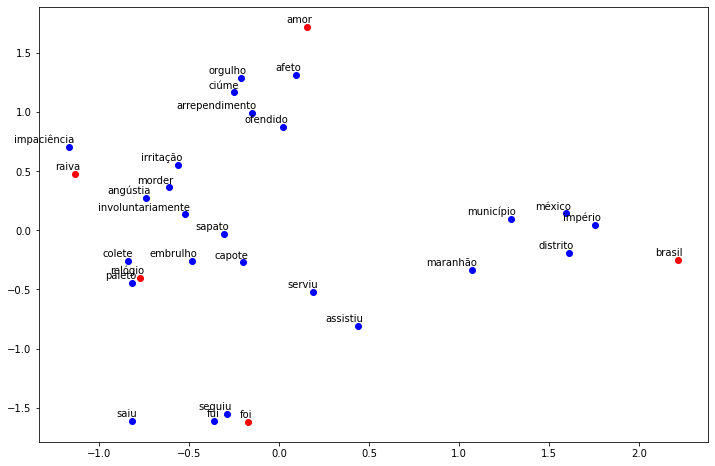

In [ ]:
plot_embedding_2d(pca_result, todas_palavras, palavras)

#### TSNE
<b> Uma técnica mais recente que captura estrutura não linear é o t-SNE, que significa distribuição estocástica de embedding viziznhos em t ( t-distributed Stochastic Neighbor Embedding).
É uma ótima técnica para capturar a estrutura não linear em dados de alta dimensão(pelo menos em nível local). Isto é, dois pontos que são próximos no espaço de alta dimensão a probabilidade de estarem próximos em uma dimensão baixa é alta. </b>

Mais informações: https://medium.com/@garora039/dimensionality-reduction-using-t-sne-effectively-cabb2cd519b

<b> Atividade </b>

24) Gere a visualização dos embeddings anteriores utilizando o TSNE para reduzir a dimensionalidade.

Exemplo do TSNE:

```python
#uso de TSNE
tsne = TSNE(n_components=2, random_state=0)
tsne_result =  tsne.fit_transform(array_embeddings)
```

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
tsne_result =  tsne.fit_transform(array_embeddings)

In [ ]:
tsne_result.shape

(30, 2)

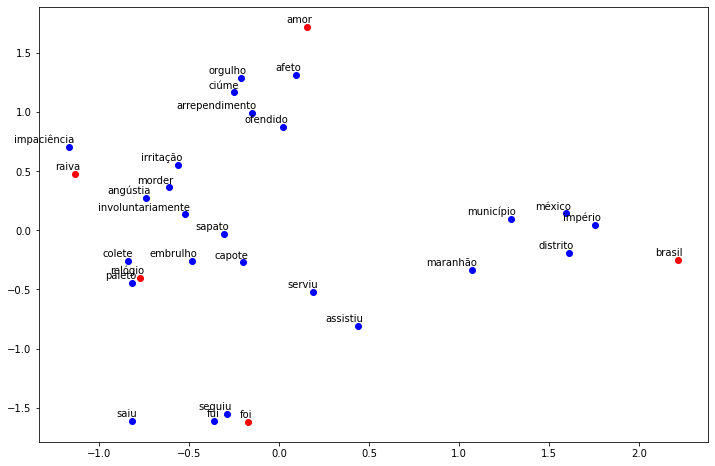

In [ ]:
plot_embedding_2d(tsne_result, todas_palavras, palavras)

#### UMAP

<b> Técnica super nova!! Foi lançada em 2018! Observe que o resultado do UMAP com o TSNE é semelhante. Mas existem várias vantagens do UMAP, por exemplo: é mais rápido que o t-SNE; ele captura melhor a estrutura global </b>

Mais informações: https://medium.com/@dan.allison/dimensionality-reduction-with-umap-b081837354dd

<b> Atividade </b>

25) Gere a visualização dos embeddings anteriores utilizando o UMAP para reduzir a dimensionalidade.

Exemplo do UMAP:

```python
#uso de TSNE
umap = umap.UMAP()
umap_result =  umap.fit_transform(array_embeddings)
```

In [ ]:
umap = umap.UMAP()
umap_result =  umap.fit_transform(array_embeddings)

In [ ]:
umap_result.shape

(30, 2)

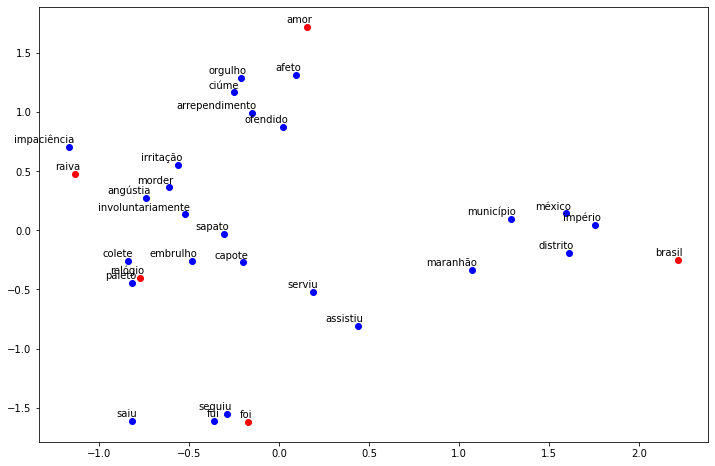

In [ ]:
plot_embedding_2d(umap_result, todas_palavras, palavras)

<b> Atividade </b>

26) Faça uma comparação analisando os método: PCA, TSNE e Umap. Depois da sua análise, informe se teve algum com melhor desempenho.

In [ ]:
Com base nas leituras dos documentos sugeridos, entendo que os métodos são recursos para redução de dimensionalidade, analisando e selecionando as variaveis de maior peso.
PCA é um método linear enquanto t-SNE e UMAP são não lineares, a diferença é que a maioria dos desafios são não lineares como imagens.
Existe diferença e velocidada entreos os métodos, sendo na ordem de mais rápido: UMAP, t-SNE e PCA.
A principal diferença entre t-SNE e UMAP é que ambos preservam estrutura local, poré, apenas o UMAP também preserva estrutura global do dataset. O que significa apenas com o UMAP podemos interpretar distâncias entre dois clusters.
Por fim qual método ser utilizado, vai depender da complexidade do dataset e do objetivo do usuário, por exemplo para problemas de redução linear por que não o PCA é mais simples e atenderia.